In [31]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, Ridge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, RepeatedKFold,GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pickle

In [32]:
# ignore FutureWarning messages in scikit-learn

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [33]:
df = pd.read_csv('train.csv')

In [34]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Analyze data distribution

## Numerical data

In [35]:
train_num = df.select_dtypes(exclude=['object']).columns
train_num = [x for x in train_num]

In [36]:
len(train_num)

38

Skewness=1.686
Statistics=0.848, p=0.000
Data does not look normal (reject H0)


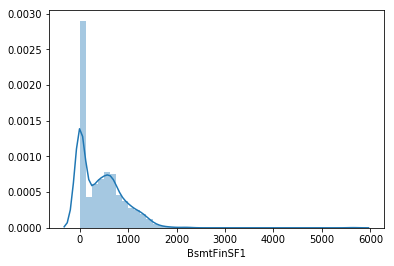

In [37]:
from scipy.stats import shapiro
stat, p = shapiro(df['BsmtFinSF1'])
print('Skewness=%.3f' %df['BsmtFinSF1'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

alpha = 0.05
if p > alpha:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')

sns.distplot(df['BsmtFinSF1']);

Skewness=0.596
Statistics=0.658, p=0.000


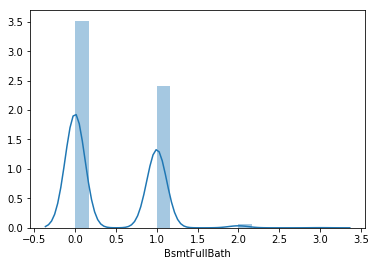

In [38]:
stat, p = shapiro(df['BsmtFullBath'])
print('Skewness=%.3f' %df['BsmtFullBath'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(df['BsmtFullBath']);

Skewness=12.208
Statistics=0.351, p=0.000


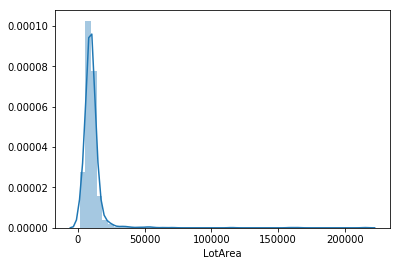

In [39]:
stat, p = shapiro(df['LotArea'])
print('Skewness=%.3f' %df['LotArea'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(df['LotArea']);

After log transformation...
Skewness=-0.138
Statistics=0.905, p=0.000


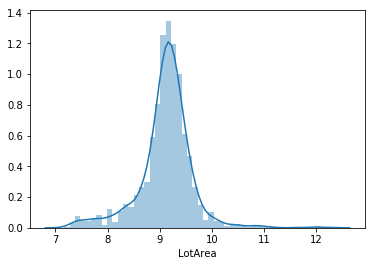

In [40]:
stat, p = shapiro(np.log(df['LotArea']))
print('After log transformation...')
print('Skewness=%.3f' %np.log(df['LotArea']).skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(np.log(df['LotArea']));

## Categorical variables

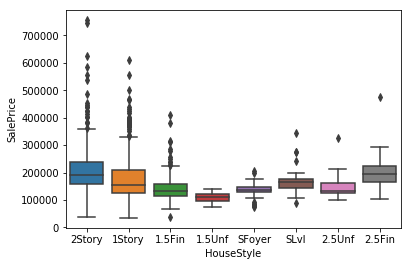

In [41]:
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df, linewidth = 1.5);

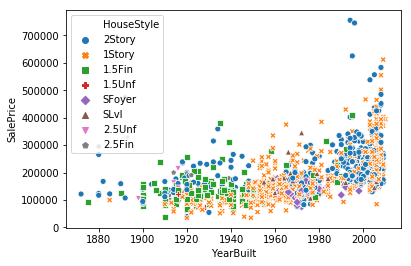

In [42]:
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = df, hue = 'HouseStyle', style = 'HouseStyle');

Houses that were built recently tend to have higher prices, and we can also that 1.5Fin house styles were very common until about 1940, then, 1Story houses boomed, and after that 2Story houses

## Target variable

Skewness=1.883
Statistics=0.870, p=0.000


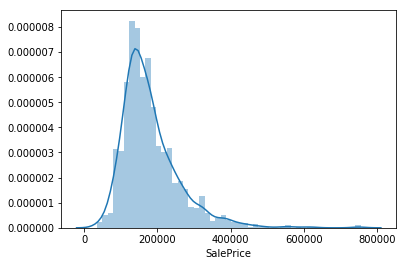

In [43]:
stat, p = shapiro(df['SalePrice'])
print('Skewness=%.3f' %df['SalePrice'].skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(df['SalePrice']);

After log transformation...
Skewness=0.121
Statistics=0.991, p=0.000


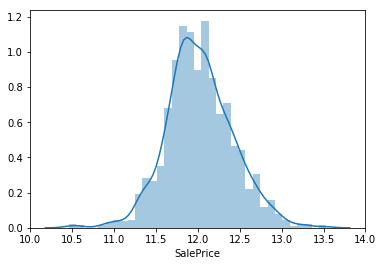

In [44]:
stat, p = shapiro(np.log(df['SalePrice']))
print('After log transformation...')
print('Skewness=%.3f' %np.log(df['SalePrice']).skew())
print('Statistics=%.3f, p=%.3f' %(stat, p))

sns.distplot(np.log(df['SalePrice']));

# Check for NaN values

In [45]:
null = df.isnull().sum().reset_index().rename(columns={0:'count_null'})

In [46]:
null['percentage'] = null['count_null'] / len(df)

In [47]:
len(df)

1460

In [48]:
null = null.sort_values(by='percentage', ascending=False)

I'll drop the 5 columns that has the more NaN values.

On PoolQC column for example, 99% of the values are null.

In [49]:
null.head(20)

,index,count_null,percentage
72,PoolQC,1453,0.995205
74,MiscFeature,1406,0.963014
6,Alley,1369,0.937671
73,Fence,1179,0.807534
57,FireplaceQu,690,0.472603
3,LotFrontage,259,0.177397
59,GarageYrBlt,81,0.055479
64,GarageCond,81,0.055479
58,GarageType,81,0.055479
60,GarageFinish,81,0.055479


In [50]:
df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

For **LotFrontage**, I will input the median value is it is NaN

In [51]:
df['LotFrontage'].mean()

70.04995836802665

In [52]:
df['LotFrontage'].median()

69.0

In [53]:
df['LotFrontage'].fillna((df['LotFrontage'].median()), inplace=True)

Drop all other values that are null after those transformations.

After doing so, I will lose about 9% of training data

In [54]:
len(df.dropna())/len(df)

0.9164383561643835

In [55]:
df = df.dropna()

# Start Modeling

In [56]:
cat_ = [x for x in df.select_dtypes(exclude=['int64','float64']).columns]

In [57]:
df_final = pd.get_dummies(df, columns=cat_)


In [58]:
X = df_final.drop(columns=['SalePrice'])

# Select our target/dependent variable
y = df_final['SalePrice']

Divide dataset into train and test

The competition provided a test set, although I will only use it after defining which model is the better for this task

In [59]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

## Random Forest

In [60]:
cv = RepeatedKFold(n_splits=12, n_repeats=15)
regr_rf1 = GridSearchCV(RandomForestRegressor(), cv=cv, verbose=1,
                  param_grid={"max_depth": np.arange(2,50,3)})

regr_rf1.fit(X_train.drop(columns=['Id']), y_train)
y_pred = regr_rf1.predict(X_test.drop(columns=['Id']))
print(regr_rf1.best_params_);

# model evaluation
print('Random Forest absolute error: ', mean_absolute_error(y_test, y_pred))
print('Random Forest squared error: ',mean_squared_error(y_test, y_pred))
print('Random Forest Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

print(regr_rf1.best_score_)

Fitting 180 folds for each of 16 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:  8.0min finished


{'max_depth': 23}
Random Forest absolute error:  20904.021945701355
Random Forest squared error:  1735205305.622104
0.8702017332935449


In [61]:
print('Random Forest Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest Root Mean Squared Error: 41655.79558263296


In [62]:
feature_list = list(X_train.drop(columns=['Id']).columns)

# Get numerical feature importances
importances = list(regr_rf1.best_estimator_.feature_importances_)


# List of list with variable and importance
feature_importances = [[feature, round(importance, 5)] for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)



# Convert feature_importances to a df
feature_importances = pd.DataFrame(feature_importances).rename(columns={0:'feature',1:'feat_imp_clicks'})

In [63]:
feature_importances.sort_values(by='feat_imp_clicks', ascending=False)[:10]

,feature,feat_imp_clicks
0,OverallQual,0.54339
1,GrLivArea,0.14245
2,TotalBsmtSF,0.04214
3,1stFlrSF,0.02968
4,LotArea,0.02874
5,FullBath,0.02413
6,2ndFlrSF,0.02169
7,BsmtFinSF1,0.02068
8,GarageArea,0.01673
9,YearRemodAdd,0.01543


# Gradient Boosting

In [ ]:
import  datetime
start = datetime.datetime.now()
start

In [113]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":np.arange(2,15,3),
    "n_estimators":[10]
    }

xgb = GridSearchCV(GradientBoostingRegressor(max_depth=5), cv=10, verbose=1,
                  param_grid=parameters)

xgb.fit(X_train.drop(columns=['Id']), y_train)

y_pred = xgb.predict(X_test.drop(columns=['Id']))
print(xgb.best_params_);

# model evaluation
print('GradientBoost absolute error: ', mean_absolute_error(y_test, y_pred))
print('GradientBoost squared error: ',mean_squared_error(y_test, y_pred))
print('GradientBoost Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

print(xgb.best_score_)

Fitting 10 folds for each of 5040 candidates, totalling 50400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
finish = datetime.datetime.now()
finish
finish - start

#### Baseline Gradient

In [233]:
xgb_baseline = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)

xgb_baseline.fit(X_train.drop(columns=['Id']), y_train)


y_pred = xgb_baseline.predict(X_test.drop(columns=['Id']))
# print(xgb_baseline.feature_importances_)

feat_imp = pd.Series(xgb_baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.sort_values(ascending=False)[:10]

OverallQual       0.097741
GrLivArea         0.072070
KitchenQual_Ex    0.061773
TotalBsmtSF       0.059684
GarageYrBlt       0.051191
YearBuilt         0.049999
FullBath          0.047734
GarageArea        0.044712
BsmtQual_TA       0.044170
LotArea           0.040806
dtype: float64

In [128]:
print('GradientBoost absolute error: ', mean_absolute_error(y_test, pred))
print('GradientBoost squared error: ',mean_squared_error(y_test, pred))
print('GradientBoost Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

GradientBoost absolute error:  18825.080178922486
GradientBoost squared error:  1732746696.0294063
GradientBoost Root Mean Squared Error: 41626.274106979676


#### Tune

https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

In [142]:
param_grid={'n_estimators':[100], 'learning_rate': [0.1],# 0.05, 0.02, 0.01], 
            'max_depth':[6],#4,6], 
            'min_samples_leaf':[3],#,5,9,17], 
            'max_features':[1.0],#,0.3]#,0.1] 
           }

xgb_tune = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters)

xgb_tune.fit(X_train.drop(columns=['Id']), y_train)


y_pred_xgb_tune = xgb_tune.predict(X_test.drop(columns=['Id']))

# feat_imp = pd.Series(xgb_tune.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.sort_values(ascending=False)[:10]

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [147]:
feat_imp = pd.Series(xgb_tune.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.sort_values(ascending=False)[:10]

OverallQual       0.404226
GrLivArea         0.215401
GarageCars        0.114782
TotalBsmtSF       0.086415
BsmtFinSF1        0.045662
FullBath          0.032471
1stFlrSF          0.028651
YearBuilt         0.020664
YearRemodAdd      0.014848
KitchenQual_TA    0.010737
dtype: float64

In [146]:
print('GradientBoost absolute error: ', mean_absolute_error(y_test, y_pred_xgb_tune))
print('GradientBoost squared error: ',mean_squared_error(y_test, y_pred_xgb_tune))
print('GradientBoost Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_xgb_tune)))

GradientBoost absolute error:  22069.849500935703
GradientBoost squared error:  1177051763.3368137
GradientBoost Root Mean Squared Error: 34308.18799261794


In [145]:
pickle.dump(xgb_tune, open('xgb_tune.pkl','wb'))

In [150]:
print ("R-squared for Train: %.2f" %xgb_tune.score(X_train.drop(columns=['Id']), y_train))
print ("R-squared for Test: %.2f" %xgb_tune.score(X_test.drop(columns=['Id']), y_test))

R-squared for Train: 0.77
R-squared for Test: 0.76


# More Tuning

In [162]:
np.arange(4,20,2)

array([ 4,  6,  8, 10, 12, 14, 16, 18])

In [169]:
param_grid={'n_estimators':[100], 'learning_rate': [0.20, 0.15, 0.1, 0.05, 0.02, 0.01], 
            'max_depth':np.arange(4,20,2), 
            'min_samples_leaf':[3,5,9,17], 
            'max_features':[1.0,0.3,0.1] 
           }

xgb_tune = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid)

xgb_tune.fit(X_train.drop(columns=['Id']), y_train)


y_pred_xgb_tune = xgb_tune.predict(X_test.drop(columns=['Id']))

# feat_imp = pd.Series(xgb_tune.feature_importances_, predictors).sort_values(ascending=False)
# feat_imp.sort_values(ascending=False)[:10]

In [170]:
pickle.dump(xgb_tune, open('xgb_tune3.pkl','wb'))

In [171]:
print('GradientBoost absolute error: ', mean_absolute_error(y_test, y_pred_xgb_tune))
print('GradientBoost squared error: ',mean_squared_error(y_test, y_pred_xgb_tune))
print('GradientBoost Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_xgb_tune)))

GradientBoost absolute error:  17619.796349339456
GradientBoost squared error:  1532221401.9760683
GradientBoost Root Mean Squared Error: 39143.599757509124


In [172]:
print ("R-squared for Train: %.2f" %xgb_tune.score(X_train.drop(columns=['Id']), y_train))
print ("R-squared for Test: %.2f" %xgb_tune.score(X_test.drop(columns=['Id']), y_test))

R-squared for Train: 0.99
R-squared for Test: 0.68


In [173]:
feat_imp = pd.Series(xgb_tune.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.sort_values(ascending=False)[:10]

OverallQual       0.174793
ExterQual_TA      0.107032
BsmtQual_Ex       0.084228
GrLivArea         0.072964
1stFlrSF          0.069907
YearBuilt         0.038165
TotalBsmtSF       0.037200
KitchenQual_Ex    0.031563
Fireplaces        0.028401
FullBath          0.028265
dtype: float64

In [174]:
xgb_tune.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=0.1,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=5,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

# Log Error

Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. 

In [195]:
Y = y_test.reset_index()

Y['log_value'] = np.log(Y['SalePrice'])

Y['y_pred_xgb_tune'] = y_pred_xgb_tune

Y['log_pred'] = np.log(Y['y_pred_xgb_tune'])

print('GradientBoost Root Mean Squared Error:', np.sqrt(mean_squared_error(Y['log_value'], Y['log_pred'])))

GradientBoost Root Mean Squared Error: 0.1541356058710809
